### This file will give us the basics of how to approach a Simple Linear Regression problem
### Here we are using the advertising dateset (https://www.kaggle.com/ashydv/advertising-dataset)
### we will exlore the data , predict and plot (curve fitting) a Linear Regression problem using scikit lear and understand the 
### various statistical aspects using statsmodels library


In [16]:
# importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
# importing data into pandas dataframe
df = pd.read_csv('/workspace/Datasets/Advertisings.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [70]:
# checking the dimensionality of the data
df.shape

(200, 5)

In [9]:
# checking null values in the data
df.isnull().any()

Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [10]:
# finding out the correlation between data columns
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

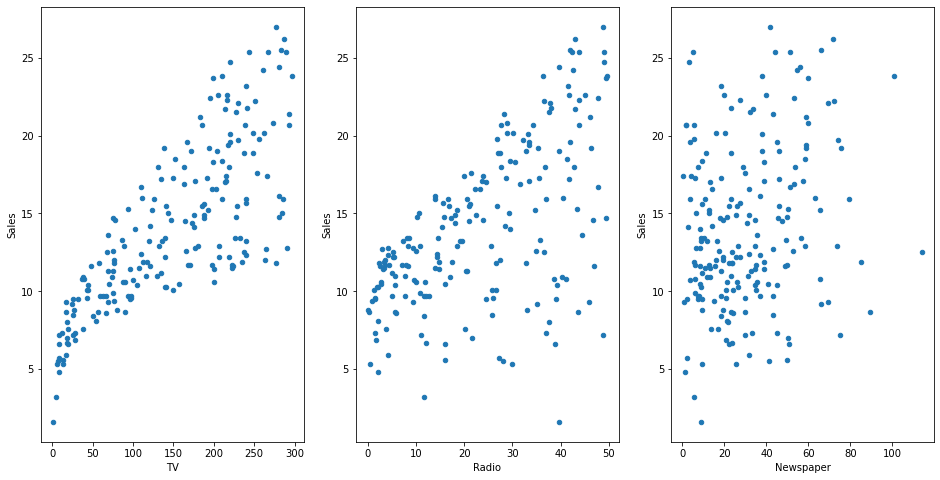

In [73]:
# exploring the data by plotting it 
fig, axs = plt.subplots(1,3)
df.plot(kind='scatter', x='TV', y='Sales', ax=axs[0],figsize=(16,8))
df.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
df.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [38]:
# declaring variables to use in model building
features = df['TV'].values
target = df['Sales'].values

In [39]:
target

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [40]:
features

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [41]:
# importing scikit learn library split dataset method to apply to the dataset
from sklearn.model_selection import train_test_split

In [42]:
# this step is done to split the data into training and testing
X_train, X_test, y_train,y_test = train_test_split(features,target,random_state=10)

In [43]:
# printing the data to check the shape of the split dataset (train test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150,)
(50,)
(150,)
(50,)


In [45]:
# reshaping the data
X_test = X_test.reshape(50,-1)
X_test.shape

X_train = X_train.reshape(150,-1)
X_train.shape


(150, 1)

In [30]:
# importing scikit learn library to get the Linear Regression model to apply to the dataset
from sklearn.linear_model import LinearRegression

In [46]:
# declaring variable for Linear Regression
my_first_model = LinearRegression()

In [47]:
# fitting the data to the model
my_first_model.fit(X_train,y_train)

LinearRegression()

In [48]:
# coefficient of linear regression
my_first_model.coef_

array([0.04590078])

In [49]:
# intercept of linear regression
my_first_model.intercept_

7.152948424392984

In [52]:
X_new = pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [55]:
# predict using the model
preds = my_first_model.predict(X_new)

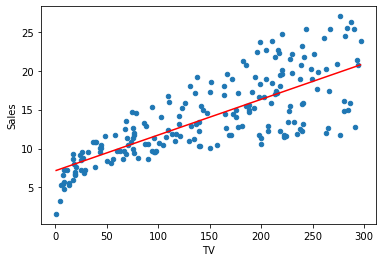

In [56]:
# fitting a curve
df.plot(kind ='scatter', x='TV', y='Sales')
plt.plot(X_new,preds,c='red');

In [59]:
# importing statsmodel library
import statsmodels.formula.api as smf
my_stats_model = smf.ols(formula='Sales ~ TV',data= df).fit()
# p value of TV is less than 0.5 then I will reject the null hypothesis
my_stats_model.pvalues


Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [60]:
# my model will be able to capture the variance 61% of the times
my_stats_model.rsquared


0.611875050850071

In [61]:
# predictio using the model
mymodelpredict = my_first_model.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [69]:
#MAE
mean_absolute_error(mymodelpredict,y_test)

2.8284900970075153

In [68]:
#MSE
mean_squared_error(mymodelpredict,y_test)

13.257223047447754

In [67]:
#RMSE
np.sqrt(mean_squared_error(mymodelpredict,y_test)

3.6410469713322504

In [74]:
#Regression - using scikit learn boston house price dataset
from sklearn.datasets import load_boston
data = load_boston()

In [93]:
# describing the data , for better view splitting it with new line character
data.DESCR.split('\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [80]:
# loading the data to a pandas dataframe
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [83]:
# printing the data keys
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


<AxesSubplot:>

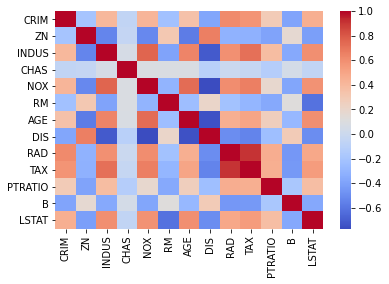

In [85]:
# plotting correlation between columns
sns.heatmap(df.corr(),cmap='coolwarm',annot=False)

In [88]:
# preparing the target and feture columns
df['target']= data.target
X = df.drop(['target'], axis = 1)
Y = df['target']

In [89]:
# this step is done to split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=100)

In [90]:
# training the Linear Regression model
from sklearn.linear_model import LinearRegression

In [91]:
# fitting the linear regression model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [99]:
# evaluating the Linear Regression model for the test set
from sklearn.metrics import mean_squared_error, r2_score
predictions = lm.predict(X_test)
RMSE_lm = np.sqrt(mean_squared_error(Y_test, predictions))
r2_lm = r2_score(Y_test, predictions)
print('RMSE_lm = {}'.format(RMSE_lm))
print('R2_lm = {}'.format(r2_lm))

RMSE_lm = 5.212786603443838
R2_lm = 0.7246154314616744
